In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /proj/som

/proj/som


In [3]:
import torch
from som import som_learner, UnsupervisedDataset, SomInterpretation, UnsupervisedDataBunch, SomLearnerFast, Som, SomFast, cluster_loss

In [4]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement, product

def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    map_size = (4,4)
    alpha = 0.3
    bs = 10
    epochs = 30
    return x, y, labels, map_size, alpha, bs, epochs

def colors_uniform():
    k = 50
    x = [list(x) for x in product(list(range(k)), repeat=3)]
    from random import shuffle
    shuffle(x)
    x = torch.FloatTensor(x) * (255 / (k-1));
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 50
    epochs = 2
    return x, y, labels, map_size, alpha, bs, epochs

def colors(n: int = 11000):
    "Loads a dataset containing all possible RGB color combinations"
#     x = torch.zeros(n, 3).normal_(mean=80.0, std=127.0).long().float()
    x = torch.zeros(n, 3).uniform_(0, 255).long().float()
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 50
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs


def colors_small():
    "Loads a dataset containing all possible RGB color combinations"
    x = torch.FloatTensor([
        [3, 255, 0],
        [0, 247, 3],
        [0, 252, 5],
        [3, 239, 8],
        [0, 232, 3],
        [3, 255, 0],
        [0, 250, 5],
        [255, 3, 0],
        [247, 3, 0],
        [252, 5, 0],
        [239, 8, 3],
        [232, 0, 3],
        [255, 3, 3],
        [249, 5, 3],
        [247, 3, 5],
        [3, 0, 255],
        [3, 0, 247],
        [5, 0, 252],
        [8, 2, 239],
        [0, 3, 232],
        [3, 3, 255],
        [5, 3, 249],
        [3, 5, 247],
        [8, 3, 234],
        [3, 5, 247],
        [5, 3, 234],
    ])
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (3, 3)
    alpha = 0.01
    bs = 4
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs

def uniform(n: int = 11000, s: int = 3):
    "Loads a uniform dataset"
    x = torch.randn(n, s)
    y = None
    labels = list(range(s))
    map_size = (6, 6)
    alpha = 0.03
    bs = 50
    epochs = 150
    return x, y, labels, map_size, alpha, bs, epochs
    

## Create the dataset

We use one of the data loading functions defined above together with the `UnsupervisedDataBunch` class.

In [5]:
x, y, labels, map_size, alpha, bs, epochs = colors_uniform()

In [6]:
db = UnsupervisedDataBunch(x, valid=0.0, sampler='seq', bs=bs)

In [7]:
# db.normalize('minmax')

In [8]:
db.train_ds.tensors[0]

tensor([[ 57.2449, 187.3469, 150.9184],
        [166.5306, 166.5306,  93.6735],
        [249.7959,  46.8367,  26.0204],
        ...,
        [145.7143,  41.6327, 145.7143],
        [244.5918, 234.1837, 145.7143],
        [150.9184, 109.2857, 145.7143]])

In [9]:
n_batches = x.shape[0] // bs
alpha, bs, epochs, n_batches

(0.03, 50, 2, 2500)

## Create the Learner

First, let's define the map size:

In [10]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(10, 10, 3)

Then we can create a Som model of the required size and pass it to a `SomLearner`:

In [11]:
# learn = SomLearnerFast(db, som)
# learn = SomLearnerFast(db, som, loss_func=None)
learn = SomLearnerFast(db, Som(size, alpha=alpha), visualize=True)

LR Find doesn't work at the moment, since it is useless on a pre-trained SOM and there is no way to pass the LR parameter directly to the model.

In [12]:
# learn.lr_find()

In [13]:
# learn.recorder.plot()

## Performance check

In [14]:
s = SomFast(size)
s

SomFast(size=(10, 10), neuron_size=3, alpha=tensor([0.0030], device='cuda:0'), sigma=tensor([5.], device='cuda:0')), dist_fn=<function pairwise_distance at 0x7efb28571510>

In [15]:
db.train_ds.tensors[0].shape

torch.Size([125000, 3])

In [16]:
# def myfun():
#     for _ in range(len(db.train_ds.tensors[0]) // bs):
#         xb, yb = db.one_batch()
#         out = s.forward(xb)
#         s.backward()
# #         loss = cluster_loss(out, xb, s, device=s.device)
# #         loss.backward()

In [17]:
# %time myfun()

## Training the model

This uses various SOM callback classes by default to visualize weights and update hyperparameters.

<IPython.core.display.Javascript object>


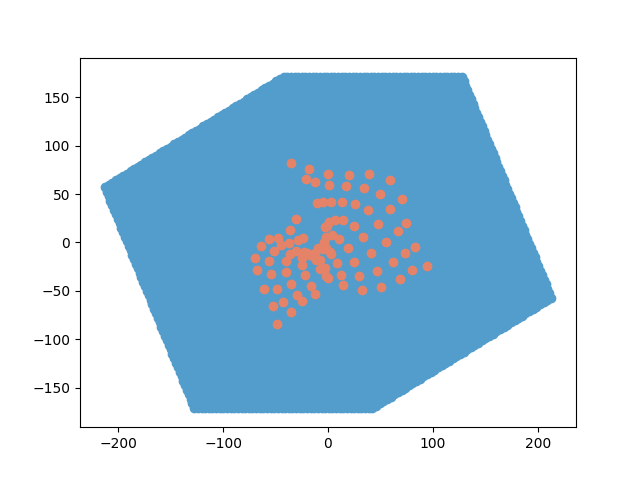

<IPython.core.display.Javascript object>


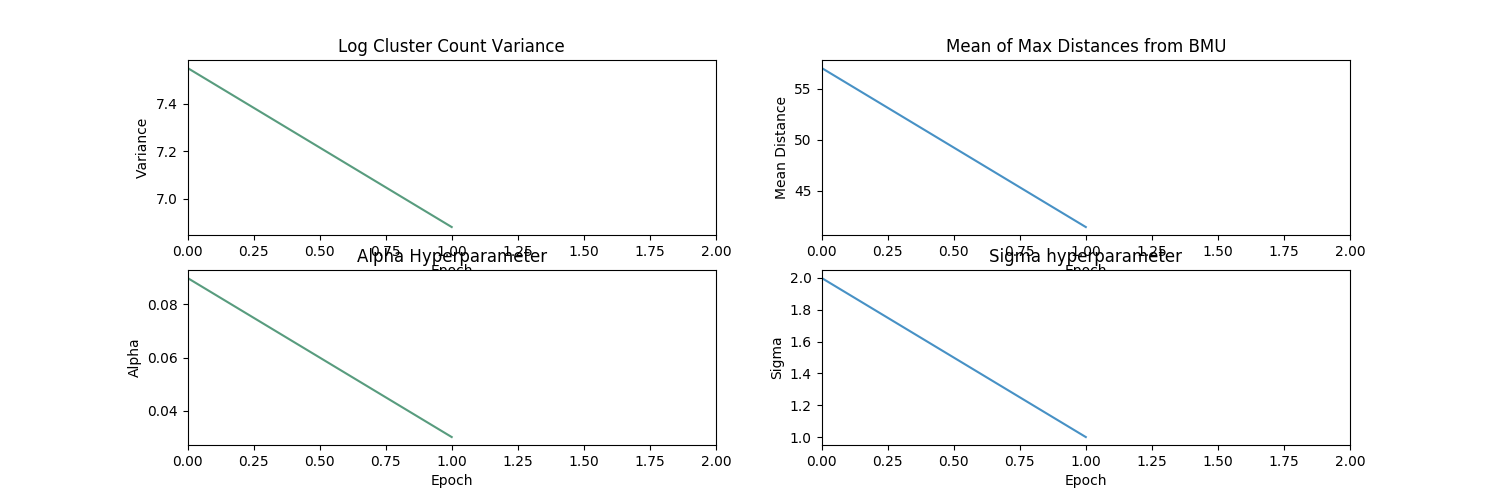

epoch,train_loss,valid_loss,time
0,0.000000,#na#,00:05
1,0.000000,#na#,00:04


In [18]:
%matplotlib notebook
learn.fit(epochs)

In [19]:
interp = SomInterpretation.from_learner(learn)

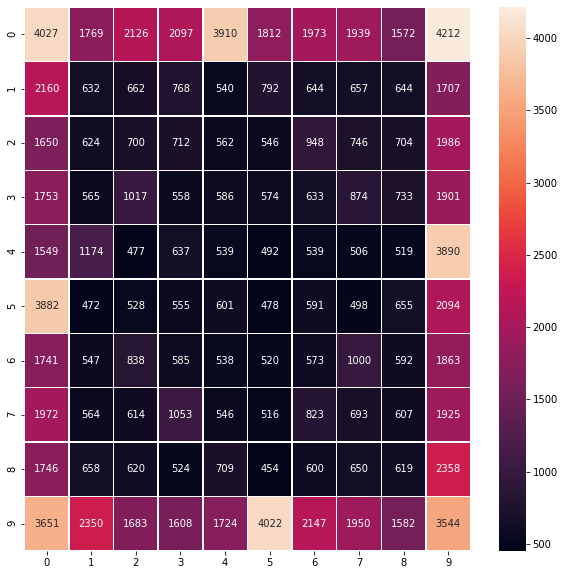

In [20]:
%matplotlib inline
interp.show_hitmap()

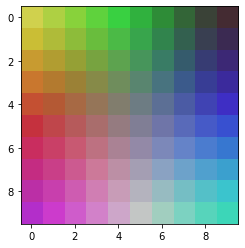

In [27]:
interp.show_weights()

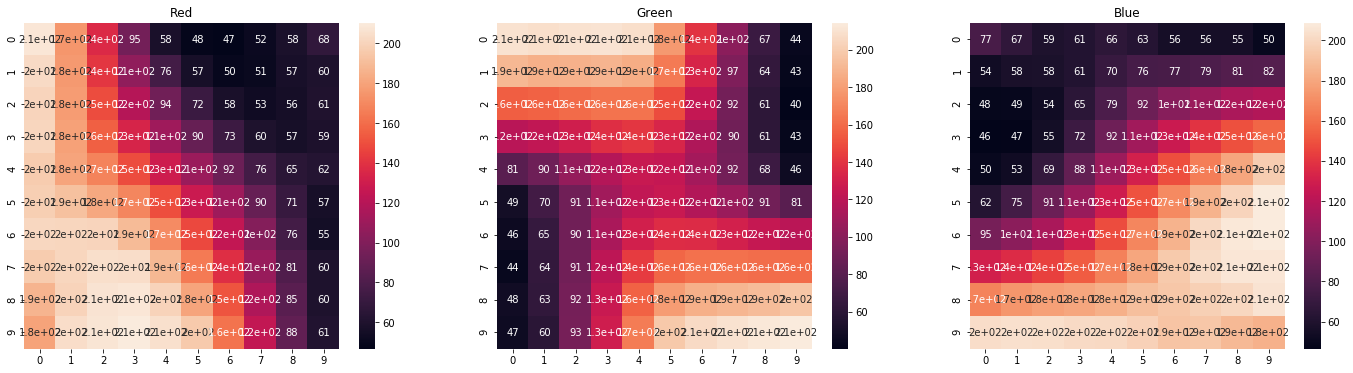

In [22]:
interp.show_feature_heatmaps(labels=labels)

In [23]:
v.show(som, what='codebook')

NameError: name 'v' is not defined

In [ ]:
# !pip install git+https://github.com/sevamoo/SOMPY

In [ ]:
import sompy
import pixiedust

In [ ]:
%%pixie_debugger
som = sompy.SOMFactory.build(x.cpu().numpy(), map_size, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='random', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

In [ ]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8) 

In [ ]:
v.show(som, what='codebook')